In [1]:
from NTT_Core import number_theoretic_transform, flip_index_ntt
import numpy as np

In [2]:
def multi_ntt_rand_seq(seqs, pm = 3 * 2**41 + 1, flip_prob = 0):
    #assert np.max(seqs) < pm
    #seqs = np.random.randint(scale, size = [layers_count+1, seq_len])
    #print("Datashape", seqs.shape)
    temp = seqs[0]
    for i in range(1,len(seqs)):
        temp = ntt_poly_mul(temp, seqs[i], pm=pm, flip_pos=flip_pos)
        #print('Mult ', i+1)
    return temp

def test_multi_layers_ham(layers, pm, scale, flip_prob, draw = True):
    #polynominals = np.random.randint(200, size = [5, 50])
    polynominals = np.array([[101, 106, 158,  74,   8,  51,   6,  94,  61, 185, 107, 195, 196,
        185,  49,  89,  36, 195, 111, 170,  34, 136, 136,  39,   8, 137,
          3, 117, 173, 155,  66,  82, 181, 142, 103,   1, 185, 181,  86,
        138,  28, 152, 138,  51,  34, 170, 103,  80,  65, 131],
       [ 48, 128,  22,  66, 175,  89,  56,  29,  31, 150, 145, 110, 101,
         31,  64,  43,  54,  36,  17,  44, 133,  99,  70,   4, 181, 106,
         93, 165, 102,  94,  28,  60, 150,  62,  57,  25,  67, 181,  49,
         23, 161, 195,  66, 177,  30, 187,  78,  41, 135, 147],
       [ 75,  14, 106, 199, 121, 169, 138, 145,  23,  66, 197,   1, 115,
         19,   7, 155,  33, 129, 144, 187, 142, 153,   7, 132,  95, 171,
         29,  21, 151, 120, 169, 114, 103,  34, 177,  65, 119,  56,  75,
          0, 196, 175, 182, 198, 104,   1,  60, 169, 191,  45],
       [ 69,  95, 106, 187,  93,  86, 138,  85,  99,  22, 158, 184, 190,
        197, 192, 142, 140, 104,  81,  58, 199, 183,  29, 184, 188,  42,
        109, 182, 179, 145, 102, 160, 109,  17,  99, 195, 154,  34, 173,
        145, 180,  17,   9,  28, 136, 141, 188,  34,  18,   4],
       [105, 161, 133, 164, 123, 185,  37, 176,   2,  95, 147, 102,  81,
         77,  13, 149, 160,  48,  99,  37,  23,  81,   7, 104, 101,  97,
        119,  36,  77, 162, 137,  68, 167, 134, 124,  96,  72, 172,  33,
         56, 196, 133, 137, 154,  36,  40, 162, 186,  46,  30]])
    epochs = 500
    samples = []
    ham_errors = []
    correct = multi_ntt_rand_seq(polynominals,  pm, flip_prob = 0)
    print(correct)
    for _ in range(epochs):
        res = multi_ntt_rand_seq(polynominals, pm, flip_prob= flip_prob)
        samples.append(res)
        ham_errors.append(hamming_distance_vector(correct, res))
    samples = np.array(samples)
    ham_errors = np.array(ham_errors)

    if draw:
        fig, ax = plt.subplots(2,dpi=200, figsize=(15,6))
        ax[0].plot(samples.T, alpha=0.3, c='blue')
        ax[0].plot(correct, c='Red')
        #ax[1].plot(np.mean(ham_errors.T,axis=1), c='blue')
        ax[1].boxplot(ham_errors)
        ax[1].plot(np.mean(ham_errors.T,axis=1), c='red')
        ax[0].set_title('Layers:{} PM:{} Scale:{} Flip_prob:{}'.format(layers, pm, scale, flip_prob))
        plt.tight_layout()
        plt.show()
    return samples, np.array(correct)

In [3]:
np.random.randint(512, size = [1, 50])

array([[347, 470,  67, 329, 458, 168,  26,  17, 424,  63, 267,  67,  30,
         74, 489,   2, 337, 183, 145, 200, 413,  35,  23, 141, 230, 364,
        108, 239, 128, 365, 346, 108, 463,  40,  31,  88, 311, 407, 466,
        390, 188, 506,  54, 425, 306, 293, 227, 342, 319, 177]])

In [4]:
polynominal_seq = np.array([165,  53, 332, 482, 150, 504, 488, 420, 136, 360, 239, 155, 487,
        149, 281,  27, 440, 128, 446, 324, 418,  86, 460, 422, 167, 425,
         37, 400, 107, 318, 322, 184, 506, 442,  99, 486, 189, 197, 369,
         76, 398, 168, 450, 266, 499, 353, 325, 268,  65, 171])

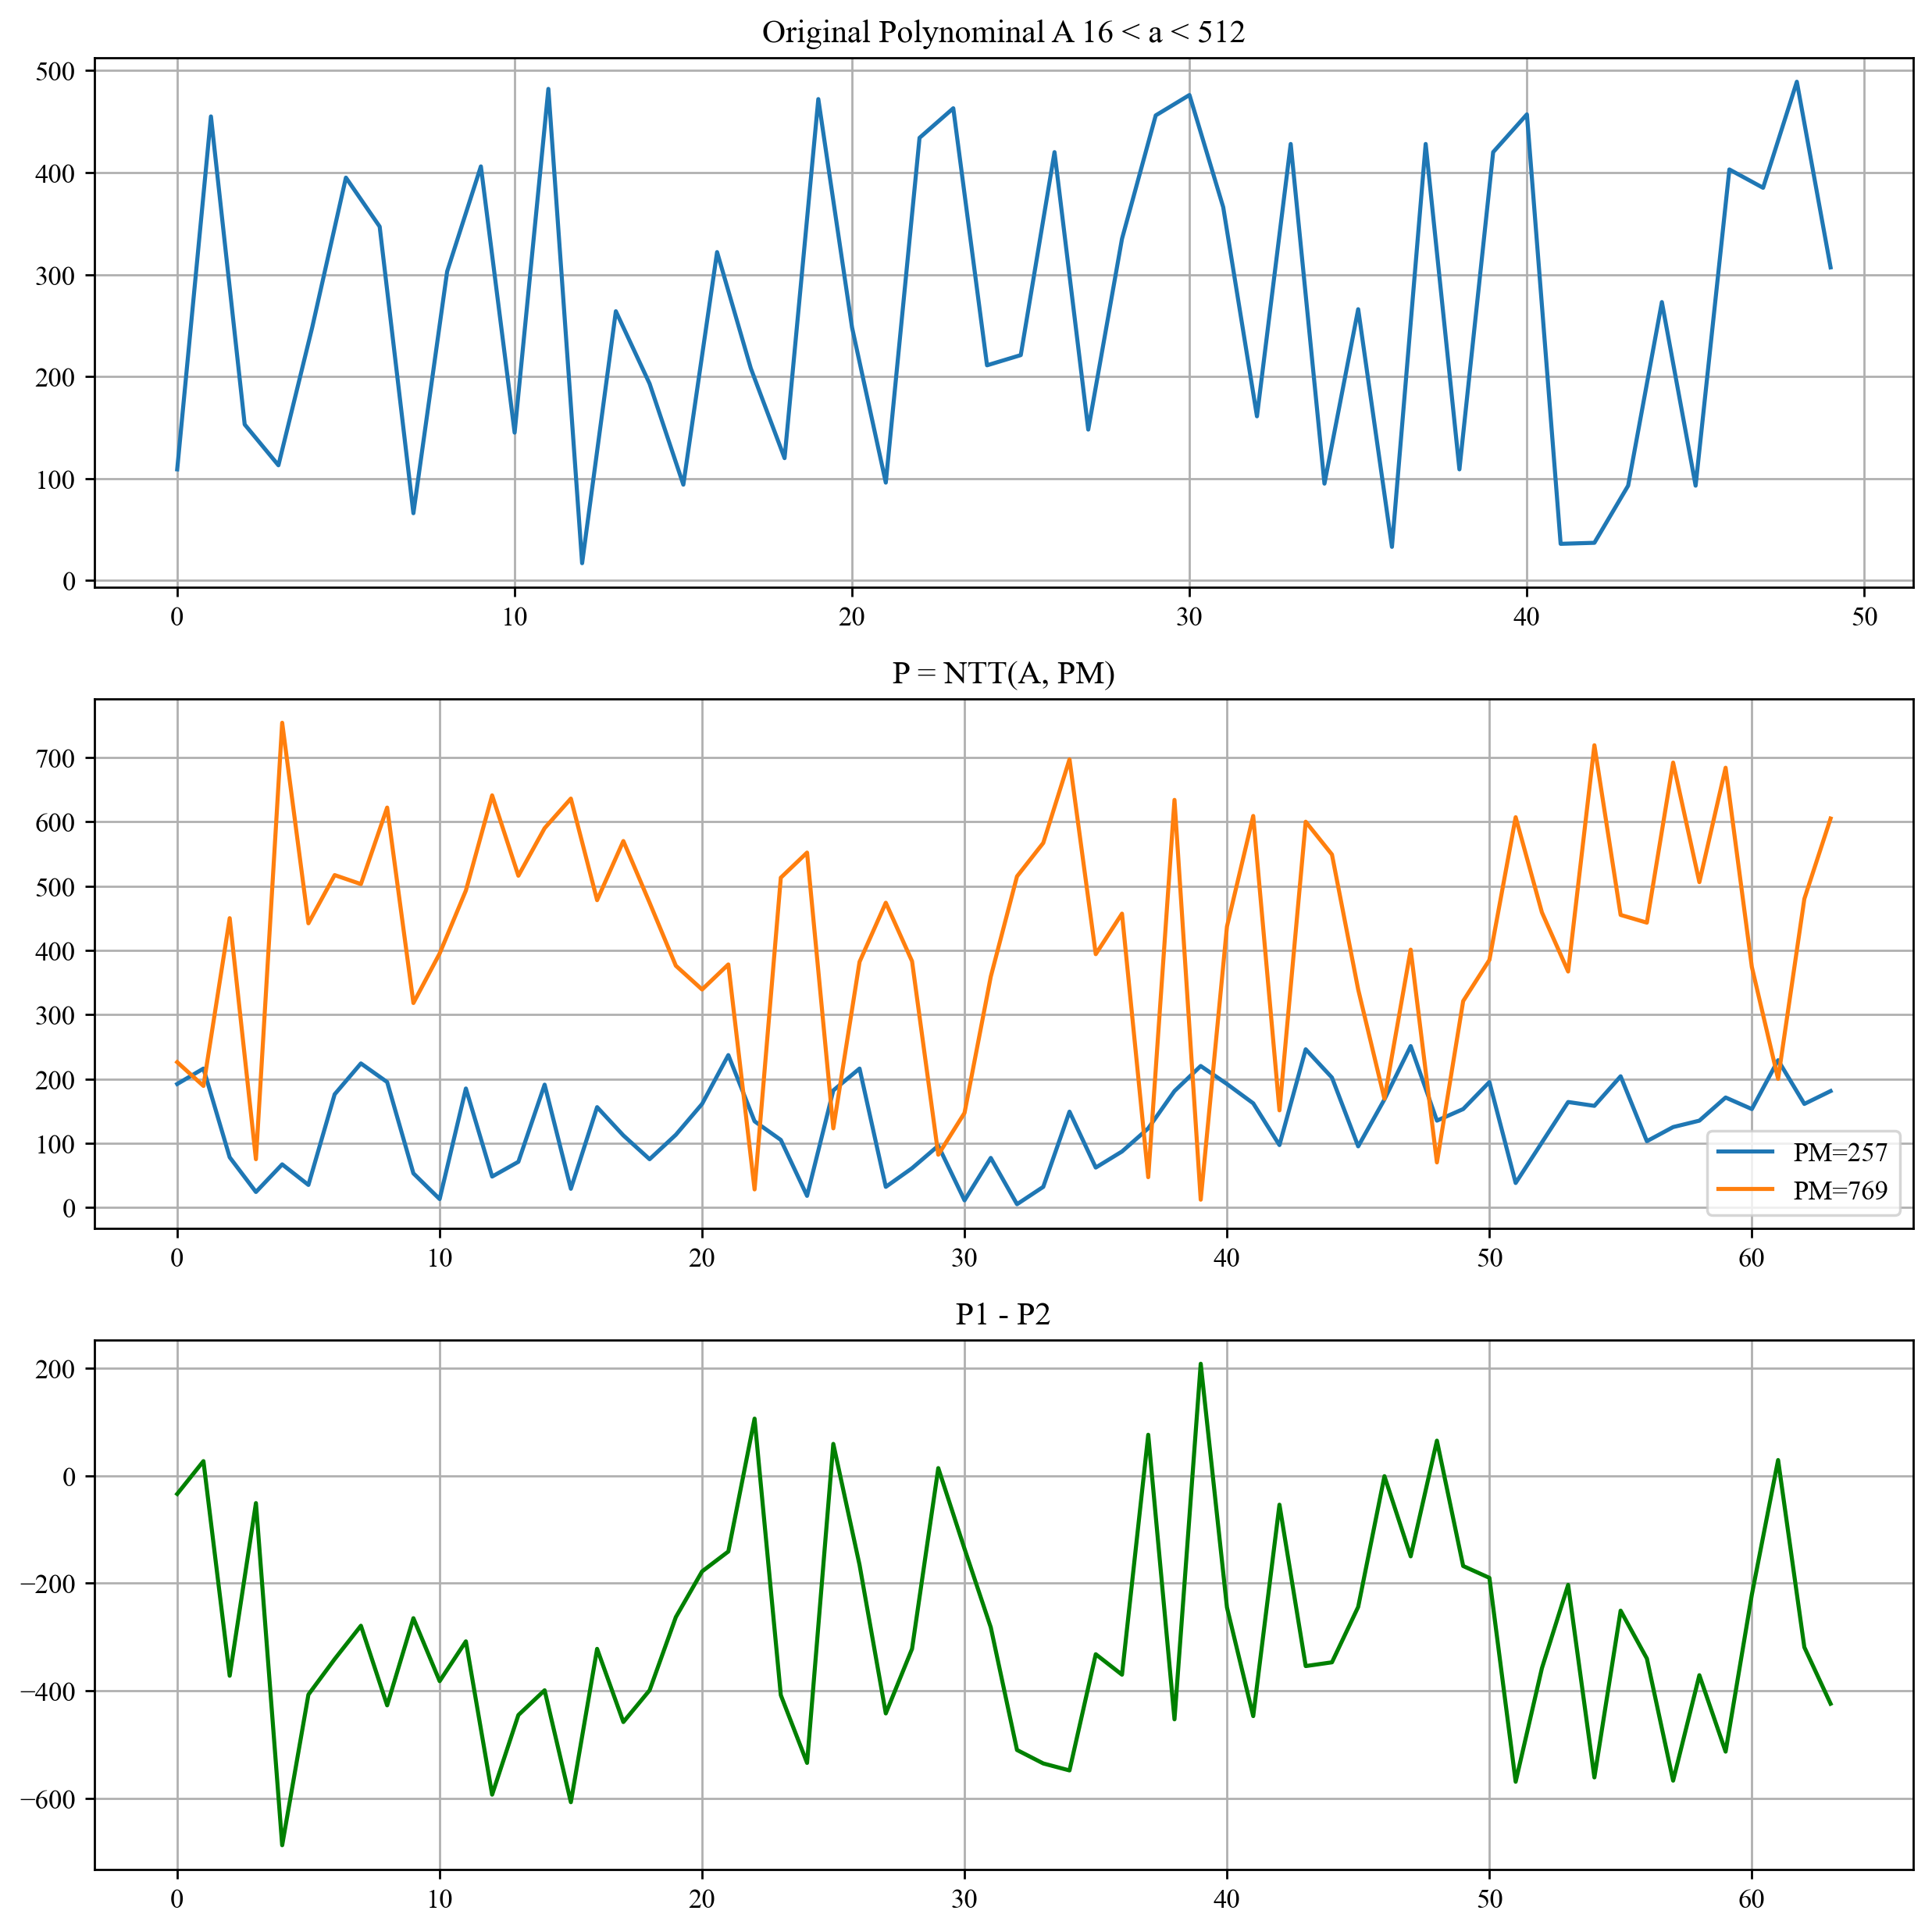

In [5]:
import matplotlib.pyplot as plt
polynominal_seq = (np.random.randint(512-16, size = [1, 50])+16)[0]
plt.rc('font',family='Times New Roman')

p1 = np.array(number_theoretic_transform(polynominal_seq, 257, log=False))
p2 = np.array(number_theoretic_transform(polynominal_seq, 769, log=False))
fig, ax = plt.subplots(3,dpi=250,figsize=[10,10])
ax[0].plot(polynominal_seq)
ax[0].set_title("Original Polynominal A 16 < a < 512")
ax[0].grid()
ax[1].plot(p1, label = "PM=257")
ax[1].plot(p2, label = "PM=769")
ax[1].set_title("P = NTT(A, PM)")
ax[1].grid()
ax[1].legend()
ax[2].plot(p1 - p2, c = 'Green')
ax[2].set_title("P1 - P2")
ax[2].grid()

plt.tight_layout()

Previous 649
After 641


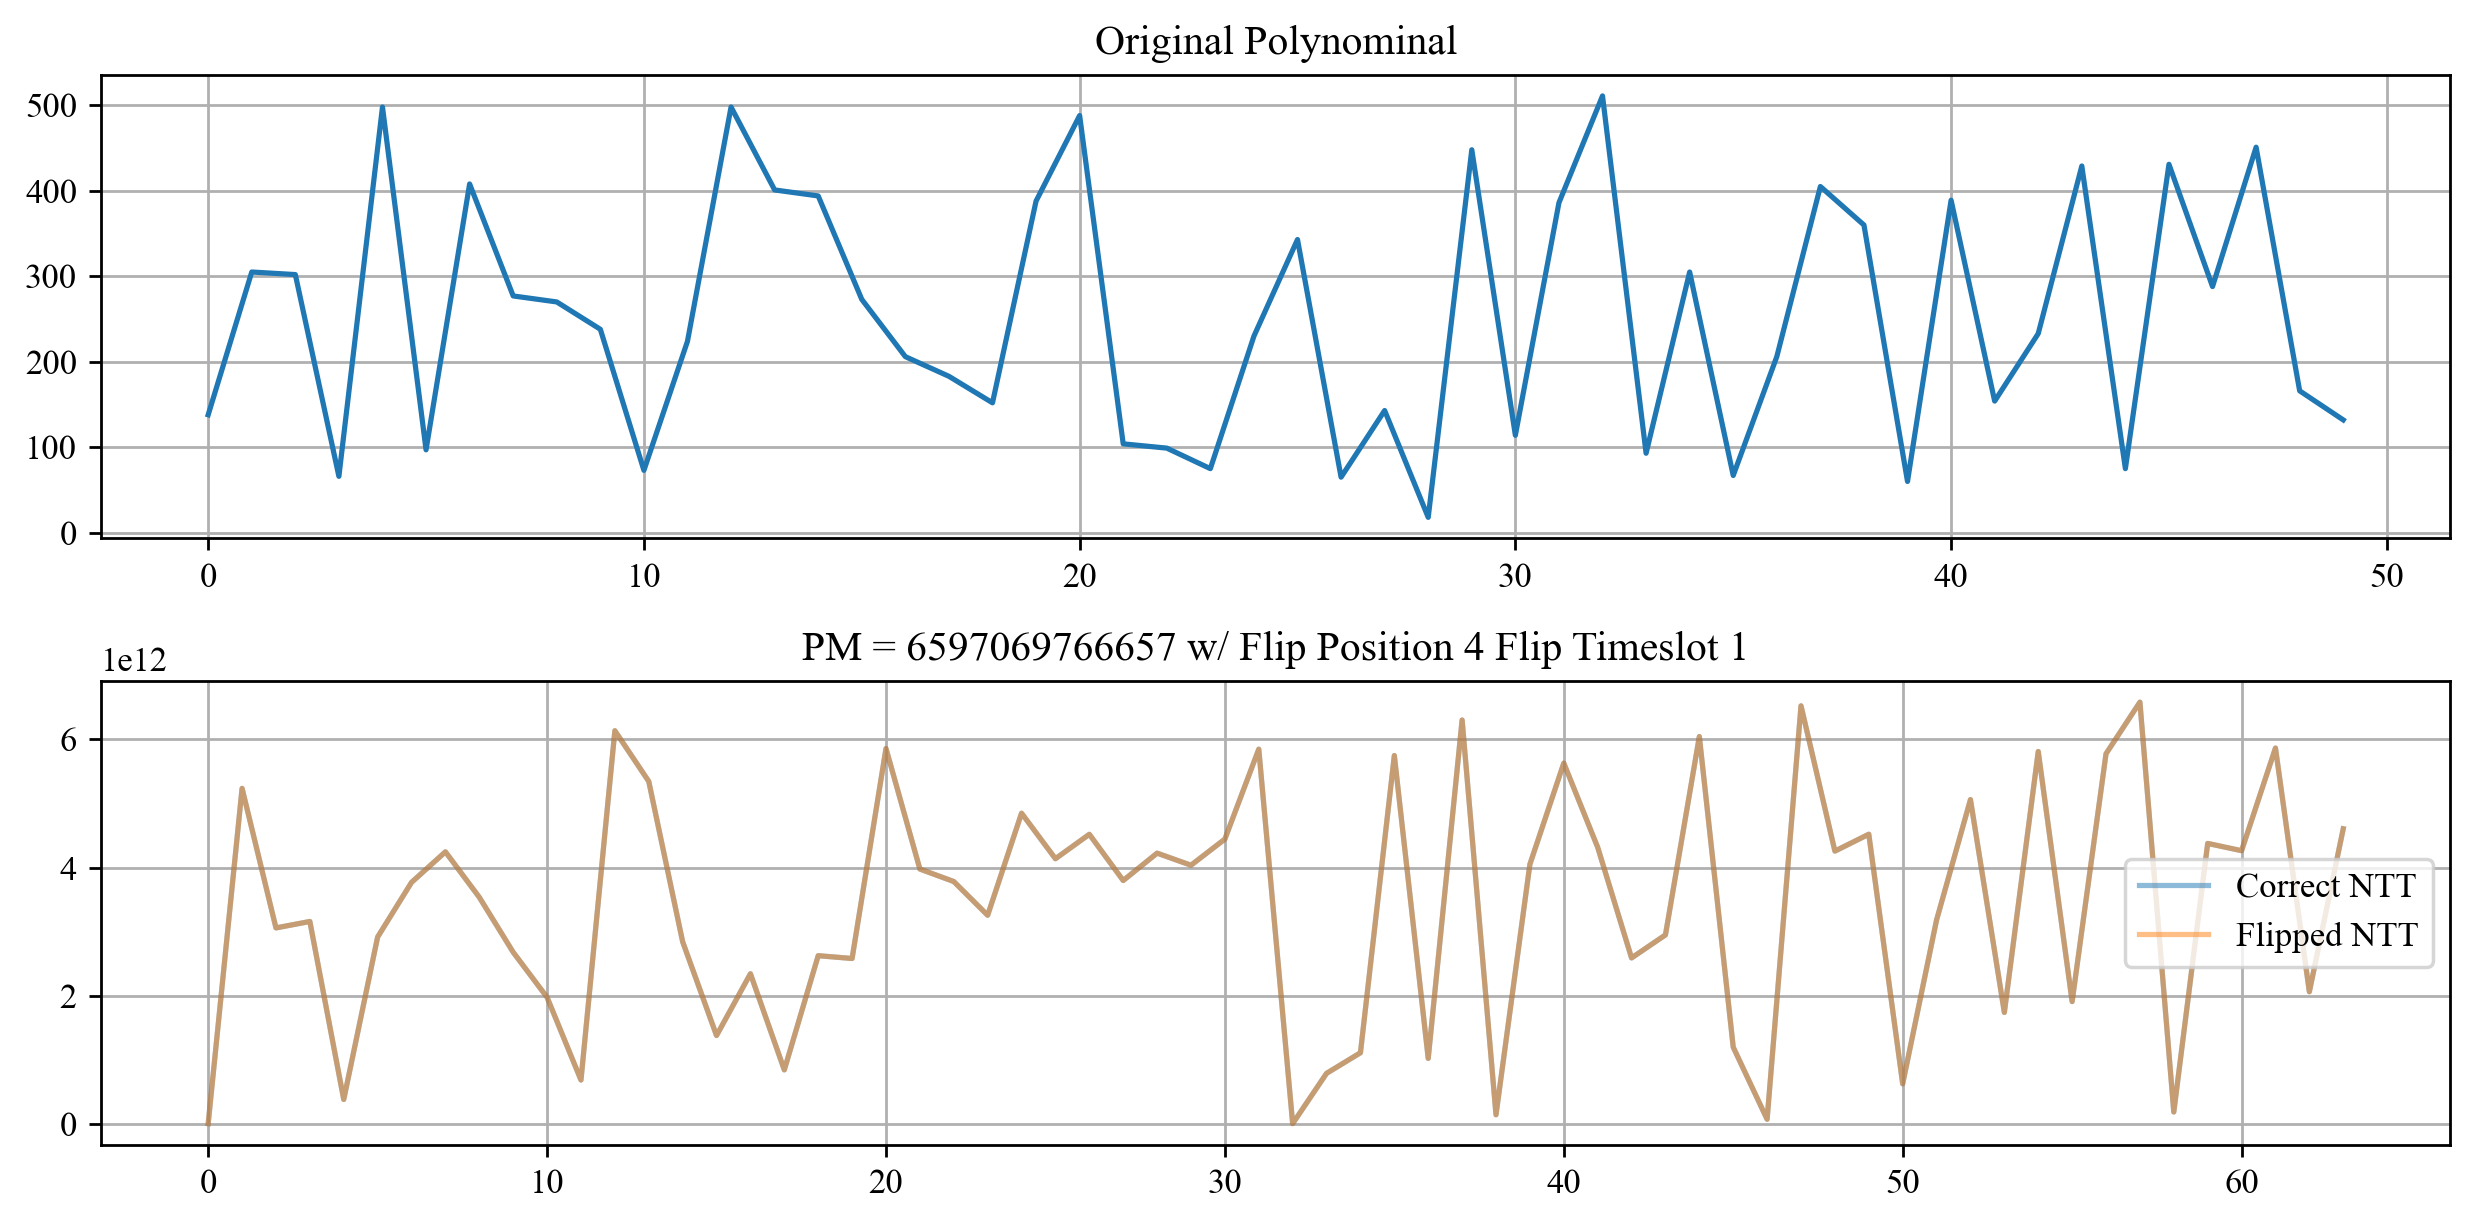

In [22]:
#flip_index_ntt(polynominal_seq, 769, 2, log=False)
flip_pos = 4
flip_time_scale = 1
PM = 3 * 2**41 + 1
polynominal_seq = (np.random.randint(512, size = [1, 50]))[0]
fig, ax = plt.subplots(flip_time_scale + 1, dpi=250, figsize=[10,5*flip_time_scale])
ax[0].set_title('Original Polynominal')
ax[0].plot(polynominal_seq)
ax[0].grid()
for i in range(1,flip_time_scale+1):
    ax[i].set_title('PM = {} w/ Flip Position {} Flip Timeslot {}'.format(PM, flip_pos, i))
    ax[i].grid()
    ax[i].plot(number_theoretic_transform(polynominal_seq, PM, log = False), label = 'Correct NTT', alpha=0.5)
    ax[i].plot(flip_index_ntt(polynominal_seq, PM, flip_pos, i,log = False), label = 'Flipped NTT', alpha=0.5)
    ax[i].legend()
plt.tight_layout()
plt.savefig('Figures/Flip-time-View')

In [26]:
len(number_theoretic_transform(polynominal_seq, PM, log = False)),len(flip_index_ntt(polynominal_seq, PM, flip_pos, 1,log = False))

Previous 649
After 641


(64, 64)

In [23]:
np.array(number_theoretic_transform(polynominal_seq, PM, log = False))
- np.array(flip_index_ntt(polynominal_seq, PM, flip_pos, 1,log = False))

Previous 649
After 641


array([        -12651, -5236210926295, -3057015874780, -3157102084897,
        -377077082747, -2914497785982, -3768096475952, -4245253183669,
       -3535130627373, -2676984298681, -1972948866630,  -680559399607,
       -6136802599794, -5345431606833, -2841142001865, -1375775223922,
       -2340919089539,  -839375709006, -2623122964121, -2579098149169,
       -5858505243350, -3976424794417, -3781451486785, -3254250247040,
       -4848278070568, -4137523097170, -4518918136299, -3797100329342,
       -4224736629444, -4035826832778, -4444235075922, -5848499965863,
                 -305,  -785225456977, -1106817431954, -5749317937991,
       -1018398060067, -6304668267137,  -138019426014, -4050538194676,
       -5630640327933, -4316368814588, -2587962592451, -2947515853601,
       -6045847505920, -1193735090028,   -67408354160, -6525941250545,
       -4256150678902, -4520046624487,  -621875764359, -3180588432392,
       -5061093235625, -1736300881679, -5812328690566, -1905976504646,
      

In [29]:
number_theoretic_transform(polynominal_seq, PM, log = False)


[12659,
 5236210926295,
 3057015874788,
 3157102084897,
 377077082755,
 2914497785982,
 3768096475960,
 4245253183669,
 3535130627381,
 2676984298681,
 1972948866638,
 680559399607,
 6136802599802,
 5345431606833,
 2841142001873,
 1375775223922,
 2340919089547,
 839375709006,
 2623122964129,
 2579098149169,
 5858505243358,
 3976424794417,
 3781451486793,
 3254250247040,
 4848278070576,
 4137523097170,
 4518918136307,
 3797100329342,
 4224736629452,
 4035826832778,
 4444235075930,
 5848499965863,
 313,
 785225456977,
 1106817431962,
 5749317937991,
 1018398060075,
 6304668267137,
 138019426022,
 4050538194676,
 5630640327941,
 4316368814588,
 2587962592459,
 2947515853601,
 6045847505928,
 1193735090028,
 67408354168,
 6525941250545,
 4256150678910,
 4520046624487,
 621875764367,
 3180588432392,
 5061093235633,
 1736300881679,
 5812328690574,
 1905976504646,
 5777160274581,
 6582975462469,
 181515370629,
 4376616483368,
 4262888477338,
 5866200125355,
 2059560091775,
 4605326773280]

In [30]:
flip_index_ntt(polynominal_seq, PM, flip_pos, 1,log = False)

Previous 649
After 641


[12651,
 5236210926295,
 3057015874780,
 3157102084897,
 377077082747,
 2914497785982,
 3768096475952,
 4245253183669,
 3535130627373,
 2676984298681,
 1972948866630,
 680559399607,
 6136802599794,
 5345431606833,
 2841142001865,
 1375775223922,
 2340919089539,
 839375709006,
 2623122964121,
 2579098149169,
 5858505243350,
 3976424794417,
 3781451486785,
 3254250247040,
 4848278070568,
 4137523097170,
 4518918136299,
 3797100329342,
 4224736629444,
 4035826832778,
 4444235075922,
 5848499965863,
 305,
 785225456977,
 1106817431954,
 5749317937991,
 1018398060067,
 6304668267137,
 138019426014,
 4050538194676,
 5630640327933,
 4316368814588,
 2587962592451,
 2947515853601,
 6045847505920,
 1193735090028,
 67408354160,
 6525941250545,
 4256150678902,
 4520046624487,
 621875764359,
 3180588432392,
 5061093235625,
 1736300881679,
 5812328690566,
 1905976504646,
 5777160274573,
 6582975462469,
 181515370621,
 4376616483368,
 4262888477330,
 5866200125355,
 2059560091767,
 4605326773280]

In [7]:
polynominal_seq

array([360, 128, 341, 397, 420, 105, 404, 125, 279, 106, 281, 476,  33,
       192, 294, 466, 444, 325, 154, 463, 302,  63, 443, 238, 155, 167,
       302,   8, 438, 482, 143, 112, 450, 143, 253, 398, 147, 434,  14,
       354, 390, 208, 448, 204, 256, 157, 487, 292, 186, 470])

In [8]:
np.min(polynominal_seq),np.max(polynominal_seq),

(8, 487)

In [9]:
bin(17)[2:].zfill(8 + 1)
polynominal_seq = (np.random.randint(512, size = [1, 50]))[0]

Previous 188
After 48572
Previous 188
After 190
Previous 188
After 184
Previous 188
After 180
Previous 188
After 172
Previous 188
After 156
Previous 188
After 252
Previous 188
After 60


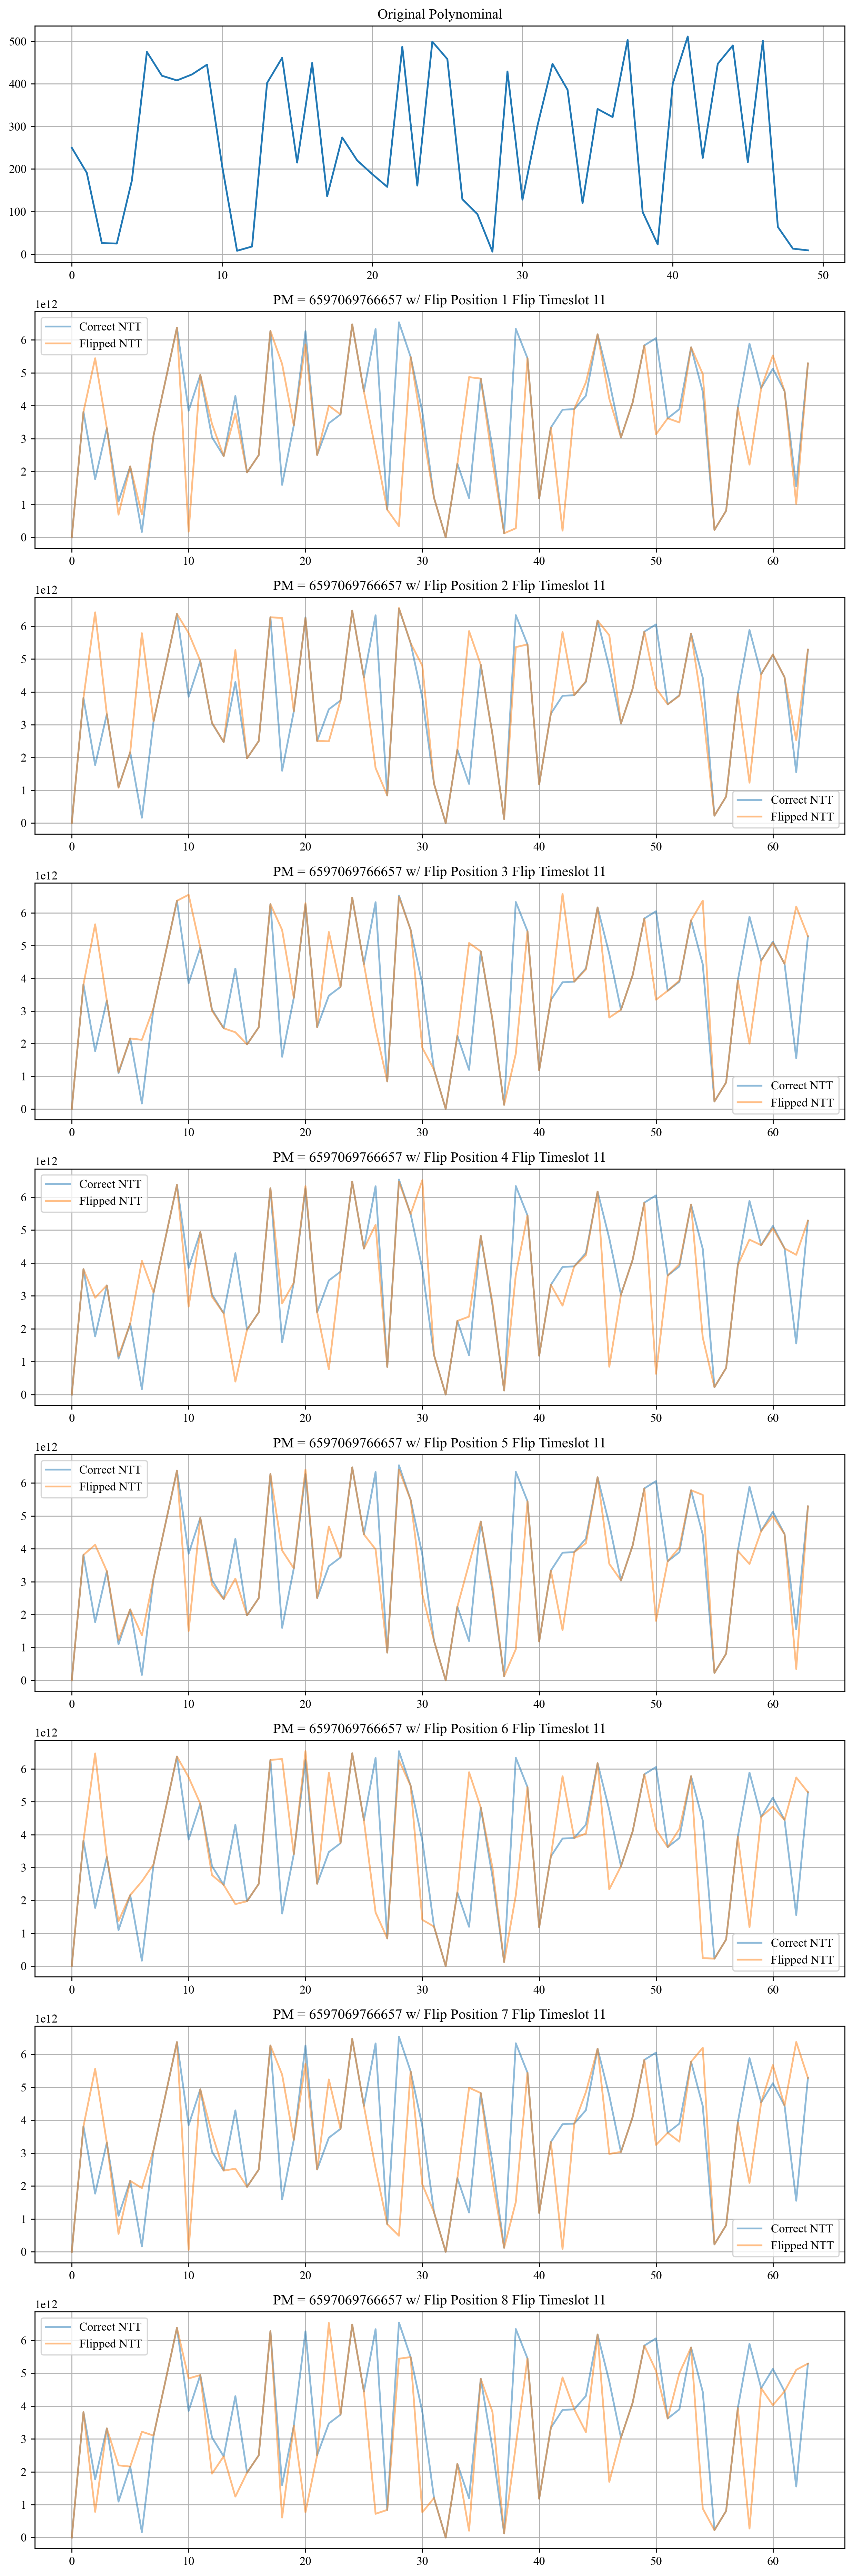

In [10]:
#flip_index_ntt(polynominal_seq, 769, 2, log=False)
flip_pos = 8
flip_time = 11
PM = 3 * 2**41 + 1

fig, ax = plt.subplots(flip_pos + 1, dpi=250, figsize=[10,3*flip_time_scale])
ax[0].set_title('Original Polynominal')
ax[0].plot(polynominal_seq)
ax[0].grid()
for i in range(1,flip_pos+1):
    ax[i].set_title('PM = {} w/ Flip Position {} Flip Timeslot {}'.format(PM, i, flip_time))
    ax[i].grid()
    ax[i].plot(number_theoretic_transform(polynominal_seq, PM, log = False), label = 'Correct NTT', alpha=0.5)
    ax[i].plot(flip_index_ntt(polynominal_seq, PM, i, flip_time,log=False), label = 'Flipped NTT', alpha=0.5)
    ax[i].legend()
plt.tight_layout()
plt.savefig('Figures/Flip-Pos-View-Time{}'.format(flip_time))

In [11]:
#flip_index_ntt(polynominal_seq, 769, 2, log=False)
from Utils import hamming_distance_vector
flip_pos = 4
flip_time_scale = 500
epochs = 100
scale = 512
PM = 3 * 2**41 + 1
polynominal_seq = np.random.randint(scale, size = [epochs, 50])
errors = []
variances = []
for opt_time in range(1, flip_time_scale + 1):
    temp = []
    for i in range(epochs):
        temp.append(np.mean(hamming_distance_vector(number_theoretic_transform(polynominal_seq[i], PM, log=False),
                              flip_index_ntt(polynominal_seq[i], PM, flip_pos = flip_pos, flip_opt_time=opt_time,log=False)
                             )))
    #print(temp)
    errors.append(np.mean(temp))
    variances.append(np.var(temp))
    
fig, ax = plt.subplots(1, dpi=250, figsize=[10,6])
ax.set_title('Mean of Hamming Distance(Flip Influence) by Flipslot w/ PM={} Flip Position{}'.format(PM, flip_pos))
ax.plot(errors, label = 'Mean')
ax.plot(variances, label = 'Variance')
ax.grid()
ax.legend()
#plt.savefig('Flip-time-View')

Previous 294
After 302
Previous 444
After 436
Previous 622
After 614
Previous 302
After 294
Previous 768
After 776
Previous 550
After 558
Previous 150
After 158
Previous 413
After 405
Previous 456
After 448
Previous 491
After 483
Previous 513
After 521
Previous 810
After 802
Previous 426
After 418
Previous 890
After 882
Previous 175
After 167
Previous 424
After 416
Previous 80
After 88
Previous 321
After 329
Previous 656
After 664
Previous 479
After 471
Previous 361
After 353
Previous 282
After 274
Previous 827
After 819
Previous 433
After 441
Previous 228
After 236
Previous 530
After 538
Previous 545
After 553
Previous 457
After 449
Previous 651
After 643
Previous 678
After 686
Previous 528
After 536
Previous 790
After 798
Previous 791
After 799
Previous 325
After 333
Previous 542
After 534
Previous 811
After 803
Previous 499
After 507
Previous 584
After 576
Previous 565
After 573
Previous 483
After 491
Previous 463
After 455
Previous 521
After 513
Previous 147
After 155
Previous 230


Previous 746
After 738
Previous 697
After 689
Previous 368
After 376
Previous 377
After 369
Previous 668
After 660
Previous 892
After 884
Previous 394
After 386
Previous 562
After 570
Previous 779
After 771
Previous 833
After 841
Previous 415
After 407
Previous 983
After 991
Previous 460
After 452
Previous 397
After 389
Previous 648
After 640
Previous 497
After 505
Previous 490
After 482
Previous 548
After 556
Previous 425
After 417
Previous 488
After 480
Previous 333
After 325
Previous 453
After 461
Previous 339
After 347
Previous 613
After 621
Previous 763
After 755
Previous 219
After 211
Previous 252
After 244
Previous 308
After 316
Previous 354
After 362
Previous 585
After 577
Previous 916
After 924
Previous 443
After 435
Previous 253
After 245
Previous 222
After 214
Previous 602
After 594
Previous 508
After 500
Previous 202
After 194
Previous 737
After 745
Previous 798
After 790
Previous 595
After 603
Previous 725
After 733
Previous 235
After 227
Previous 467
After 475
Previous 49

Previous 739
After 747
Previous 744
After 736
Previous 892
After 884
Previous 368
After 376
Previous 536
After 528
Previous 220
After 212
Previous 82
After 90
Previous 181
After 189
Previous 502
After 510
Previous 98
After 106
Previous 169
After 161
Previous 95
After 87
Previous 409
After 401
Previous 86
After 94
Previous 447
After 439
Previous 869
After 877
Previous 532
After 540
Previous 782
After 774
Previous 454
After 462
Previous 841
After 833
Previous 312
After 304
Previous 523
After 515
Previous 436
After 444
Previous 529
After 537
Previous 728
After 720
Previous 876
After 868
Previous 509
After 501
Previous 262
After 270
Previous 670
After 662
Previous 416
After 424
Previous 337
After 345
Previous 538
After 530
Previous 560
After 568
Previous 373
After 381
Previous 727
After 735
Previous 423
After 431
Previous 742
After 750
Previous 626
After 634
Previous 307
After 315
Previous 629
After 637
Previous 732
After 724
Previous 710
After 718
Previous 381
After 373
Previous 310
After

Previous 496
After 504
Previous 118
After 126
Previous 46
After 38
Previous 208
After 216
Previous 499
After 507
Previous 461
After 453
Previous 391
After 399
Previous 119
After 127
Previous 498
After 506
Previous 27
After 19
Previous 127
After 119
Previous 436
After 444
Previous 384
After 392
Previous 38
After 46
Previous 236
After 228
Previous 437
After 445
Previous 236
After 228
Previous 102
After 110
Previous 233
After 225
Previous 111
After 103
Previous 312
After 304
Previous 38
After 46
Previous 186
After 178
Previous 456
After 448
Previous 175
After 167
Previous 115
After 123
Previous 236
After 228
Previous 16
After 24
Previous 43
After 35
Previous 400
After 408
Previous 39
After 47
Previous 51
After 59
Previous 458
After 450
Previous 235
After 227
Previous 364
After 356
Previous 374
After 382
Previous 430
After 422
Previous 28
After 20
Previous 168
After 160
Previous 472
After 464
Previous 370
After 378
Previous 296
After 288
Previous 189
After 181
Previous 355
After 363
Previo

Previous 929
After 937
Previous 235
After 227
Previous 95
After 87
Previous 332
After 324
Previous 517
After 525
Previous 135
After 143
Previous 519
After 527
Previous 183
After 191
Previous 816
After 824
Previous 318
After 310
Previous 531
After 539
Previous 512
After 520
Previous 552
After 544
Previous 487
After 495
Previous 232
After 224
Previous 940
After 932
Previous 356
After 364
Previous 414
After 406
Previous 361
After 353
Previous 617
After 609
Previous 176
After 184
Previous 658
After 666
Previous 353
After 361
Previous 419
After 427
Previous 467
After 475
Previous 410
After 402
Previous 775
After 783
Previous 326
After 334
Previous 764
After 756
Previous 760
After 752
Previous 468
After 476
Previous 456
After 448
Previous 474
After 466
Previous 365
After 357
Previous 136
After 128
Previous 404
After 412
Previous 92
After 84
Previous 381
After 373
Previous 272
After 280
Previous 39
After 47
Previous 152
After 144
Previous 377
After 369
Previous 225
After 233
Previous 159
Afte

Previous 553
After 545
Previous 216
After 208
Previous 511
After 503
Previous 659
After 667
Previous 451
After 459
Previous 953
After 945
Previous 462
After 454
Previous 675
After 683
Previous 821
After 829
Previous 168
After 160
Previous 571
After 563
Previous 68
After 76
Previous 843
After 835
Previous 215
After 223
Previous 730
After 722
Previous 524
After 516
Previous 146
After 154
Previous 500
After 508
Previous 715
After 707
Previous 510
After 502
Previous 568
After 560
Previous 607
After 599
Previous 424
After 416
Previous 647
After 655
Previous 417
After 425
Previous 1007
After 999
Previous 221
After 213
Previous 243
After 251
Previous 957
After 949
Previous 572
After 564
Previous 446
After 438
Previous 634
After 626
Previous 578
After 586
Previous 917
After 925
Previous 320
After 328
Previous 585
After 577
Previous 328
After 320
Previous 380
After 372
Previous 678
After 686
Previous 418
After 426
Previous 699
After 691
Previous 397
After 389
Previous 598
After 606
Previous 698

Previous 150
After 158
Previous 479
After 471
Previous 214
After 222
Previous 485
After 493
Previous 317
After 309
Previous 191
After 183
Previous 184
After 176
Previous 335
After 327
Previous 145
After 153
Previous 27
After 19
Previous 287
After 279
Previous 510
After 502
Previous 140
After 132
Previous 101
After 109
Previous 175
After 167
Previous 351
After 343
Previous 321
After 329
Previous 328
After 320
Previous 446
After 438
Previous 258
After 266
Previous 248
After 240
Previous 408
After 400
Previous 277
After 285
Previous 94
After 86
Previous 161
After 169
Previous 0
After 8
Previous 359
After 367
Previous 201
After 193
Previous 120
After 112
Previous 231
After 239
Previous 255
After 247
Previous 158
After 150
Previous 426
After 418
Previous 115
After 123
Previous 226
After 234
Previous 191
After 183
Previous 273
After 281
Previous 442
After 434
Previous 77
After 69
Previous 325
After 333
Previous 435
After 443
Previous 347
After 339
Previous 202
After 194
Previous 412
After 40

Previous 637
After 629
Previous 924
After 916
Previous 590
After 582
Previous 860
After 852
Previous 574
After 566
Previous 608
After 616
Previous 903
After 911
Previous 510
After 502
Previous 682
After 674
Previous 631
After 639
Previous 878
After 870
Previous 1085
After 1077
Previous 878
After 870
Previous 1034
After 1026
Previous 731
After 723
Previous 284
After 276
Previous 666
After 658
Previous 708
After 716
Previous 997
After 1005
Previous 1196
After 1188
Previous 1029
After 1037
Previous 863
After 855
Previous 402
After 410
Previous 1068
After 1060
Previous 928
After 936
Previous 251
After 243
Previous 842
After 834
Previous 969
After 961
Previous 873
After 865
Previous 728
After 720
Previous 617
After 609
Previous 1030
After 1038
Previous 814
After 806
Previous 712
After 704
Previous 483
After 491
Previous 777
After 769
Previous 1189
After 1197
Previous 872
After 864
Previous 816
After 824
Previous 812
After 804
Previous 755
After 763
Previous 435
After 443
Previous 276
After 

Previous 2581671046410
After 2581671046402
Previous 2315124236330
After 2315124236322
Previous 2753636730346
After 2753636730338
Previous 6399309229660
After 6399309229652
Previous 5040780326672
After 5040780326680
Previous 4662455822254
After 4662455822246
Previous 2332320804698
After 2332320804690
Previous 4645259253612
After 4645259253604
Previous 2229141394160
After 2229141394168
Previous 4301327885754
After 4301327885746
Previous 5539480810292
After 5539480810300
Previous 3467294318724
After 3467294318732
Previous 4275533033432
After 4275533033424
Previous 5694249926093
After 5694249926085
Previous 2590269330470
After 2590269330478
Previous 5487891105137
After 5487891105145
Previous 5788831052321
After 5788831052329
Previous 6141360704174
After 6141360704166
Previous 4318524454263
After 4318524454271
Previous 2659055603527
After 2659055603535
Previous 4249738180742
After 4249738180750
Previous 2727841877540
After 2727841877548
Previous 5092370032195
After 5092370032203
Previous 29

Previous 575
After 567
Previous 544
After 552
Previous 644
After 652
Previous 813
After 805
Previous 917
After 925
Previous 1051
After 1043
Previous 954
After 946
Previous 1081
After 1073
Previous 655
After 647
Previous 602
After 594
Previous 759
After 767
Previous 729
After 721
Previous 515
After 523
Previous 746
After 738
Previous 812
After 804
Previous 617
After 609
Previous 724
After 732
Previous 661
After 669
Previous 744
After 736
Previous 721
After 729
Previous 807
After 815
Previous 670
After 662
Previous 695
After 703
Previous 912
After 920
Previous 787
After 795
Previous 463
After 455
Previous 393
After 385
Previous 311
After 319
Previous 214
After 222
Previous 956
After 948
Previous 434
After 442
Previous 280
After 272
Previous 460
After 452
Previous 590
After 582
Previous 690
After 698
Previous 921
After 913
Previous 242
After 250
Previous 1042
After 1050
Previous 1111
After 1119
Previous 917
After 925
Previous 845
After 837
Previous 867
After 875
Previous 563
After 571
Pre

Previous 676
After 684
Previous 1155
After 1163
Previous 268
After 260
Previous 996
After 1004
Previous 715
After 707
Previous 902
After 910
Previous 125
After 117
Previous 854
After 862
Previous 5152558021464
After 5152558021456
Previous 3854217107581
After 3854217107573
Previous 6493890356155
After 6493890356147
Previous 4800028368921
After 4800028368913
Previous 4739840379827
After 4739840379835
Previous 3957396517901
After 3957396517893
Previous 3475892602763
After 3475892602755
Previous 3200747508506
After 3200747508498
Previous 3338320056025
After 3338320056017
Previous 5977993304327
After 5977993304335
Previous 2779431582606
After 2779431582598
Previous 5685651641680
After 5685651641688
Previous 5247139147716
After 5247139147724
Previous 4980592337503
After 4980592337495
Previous 5685651641406
After 5685651641398
Previous 5307327136884
After 5307327136892
Previous 3389909760369
After 3389909760377
Previous 6184352125243
After 6184352125235
Previous 4817224937347
After 4817224937

Previous 6399309230333
After 6399309230325
Previous 3028781824553
After 3028781824545
Previous 3708046276147
After 3708046276155
Previous 5866215609686
After 5866215609694
Previous 4765635232690
After 4765635232698
Previous 4352917591019
After 4352917591011
Previous 5935001883235
After 5935001883243
Previous 3002986971605
After 3002986971613
Previous 6545480061448
After 6545480061440
Previous 5427703115761
After 5427703115769
Previous 4352917590841
After 4352917590833
Previous 6442300650647
After 6442300650655
Previous 4567874696014
After 4567874696006
Previous 6167155556541
After 6167155556533
Previous 2779431582877
After 2779431582869
Previous 4129362201741
After 4129362201733
Previous 3106166382434
After 3106166382442
Previous 4507686706470
After 4507686706478
Previous 3493089171108
After 3493089171116
Previous 5032182042638
After 5032182042630
Previous 3226542360764
After 3226542360756
Previous 3355516623566
After 3355516623558
Previous 5496489389299
After 5496489389307
Previous 45

Previous 646
After 654
Previous 1128
After 1120
Previous 974
After 966
Previous 1047
After 1055
Previous 793
After 785
Previous 996
After 1004
Previous 1256
After 1248
Previous 1253
After 1261
Previous 719
After 711
Previous 792
After 784
Previous 806
After 814
Previous 1632
After 1640
Previous 1142
After 1150
Previous 811
After 803
Previous 1399
After 1407
Previous 1219
After 1227
Previous 1095
After 1103
Previous 1173
After 1181
Previous 1489
After 1497
Previous 791
After 799
Previous 1301
After 1309
Previous 549
After 557
Previous 1323
After 1315
Previous 600
After 592
Previous 1322
After 1314
Previous 511
After 503
Previous 1133
After 1125
Previous 911
After 903
Previous 943
After 935
Previous 1219
After 1227
Previous 1077
After 1085
Previous 1479
After 1487
Previous 1089
After 1097
Previous 769
After 777
Previous 1271
After 1279
Previous 1361
After 1369
Previous 1449
After 1441
Previous 1272
After 1264
Previous 1477
After 1485
Previous 875
After 867
Previous 1487
After 1479
Previo

Previous 330
After 322
Previous 989
After 981
Previous 783
After 775
Previous 641
After 649
Previous 1005
After 997
Previous 903
After 911
Previous 776
After 768
Previous 523
After 515
Previous 689
After 697
Previous 726
After 734
Previous 6356317808978
After 6356317808986
Previous 3389909760994
After 3389909761002
Previous 4413105580356
After 4413105580364
Previous 4765635232298
After 4765635232290
Previous 4937600916602
After 4937600916594
Previous 3501687455343
After 3501687455335
Previous 4782831801243
After 4782831801235
Previous 3940199949443
After 3940199949451
Previous 6450898935091
After 6450898935099
Previous 5711446494469
After 5711446494477
Previous 3587670297533
After 3587670297525
Previous 4438900433050
After 4438900433042
Previous 4309926169702
After 4309926169710
Previous 2220543109885
After 2220543109877
Previous 3991789654757
After 3991789654765
Previous 3690849707915
After 3690849707907
Previous 4051977644507
After 4051977644499
Previous 6158557272079
After 615855727

Previous 639
After 631
Previous 1025
After 1033
Previous 459
After 451
Previous 1137
After 1145
Previous 936
After 928
Previous 1074
After 1082
Previous 426
After 418
Previous 400
After 408
Previous 873
After 865
Previous 355
After 363
Previous 787
After 795
Previous 682
After 674
Previous 933
After 941
Previous 1349
After 1357
Previous 701
After 693
Previous 988
After 980
Previous 859
After 851
Previous 713
After 705
Previous 682
After 674
Previous 945
After 953
Previous 711
After 719
Previous 634
After 626
Previous 645
After 653
Previous 617
After 609
Previous 755
After 763
Previous 714
After 706
Previous 751
After 743
Previous 647
After 655
Previous 711
After 719
Previous 1019
After 1011
Previous 562
After 570
Previous 518
After 526
Previous 536
After 528
Previous 944
After 952
Previous 765
After 757
Previous 998
After 1006
Previous 684
After 676
Previous 844
After 836
Previous 500
After 508
Previous 706
After 714
Previous 664
After 656
Previous 1103
After 1095
Previous 897
After 90

Previous 5161156305134
After 5161156305126
Previous 2917004129903
After 2917004129895
Previous 4215345043510
After 4215345043518
Previous 3183550940106
After 3183550940098
Previous 4920404348374
After 4920404348382
Previous 4112165633424
After 4112165633432
Previous 3355516624103
After 3355516624111
Previous 2891209277450
After 2891209277442
Previous 4086370780738
After 4086370780746
Previous 2925602414067
After 2925602414075
Previous 4215345043392
After 4215345043400
Previous 4971994053271
After 4971994053279
Previous 6313326388266
After 6313326388258
Previous 4086370780904
After 4086370780896
Previous 4817224937479
After 4817224937487
Previous 2297927667661
After 2297927667653
Previous 3854217107383
After 3854217107391
Previous 6519685209073
After 6519685209081
Previous 4963395768838
After 4963395768846
Previous 3037380108795
After 3037380108787
Previous 6244540114735
After 6244540114727
Previous 2444098499236
After 2444098499244
Previous 5573873947253
After 5573873947261
Previous 26

Previous 5152558021175
After 5152558021183
Previous 926
After 918
Previous 478
After 470
Previous 1205
After 1213
Previous 909
After 901
Previous 859
After 851
Previous 663
After 671
Previous 654
After 646
Previous 839
After 847
Previous 592
After 600
Previous 1027
After 1035
Previous 871
After 879
Previous 663
After 671
Previous 567
After 575
Previous 1084
After 1076
Previous 773
After 781
Previous 1014
After 1022
Previous 1246
After 1238
Previous 858
After 850
Previous 1102
After 1094
Previous 853
After 861
Previous 608
After 616
Previous 283
After 275
Previous 856
After 848
Previous 977
After 985
Previous 1032
After 1024
Previous 472
After 464
Previous 907
After 899
Previous 1217
After 1225
Previous 593
After 601
Previous 982
After 990
Previous 1036
After 1028
Previous 395
After 387
Previous 978
After 986
Previous 969
After 961
Previous 411
After 403
Previous 176
After 184
Previous 859
After 851
Previous 596
After 604
Previous 882
After 890
Previous 1189
After 1197
Previous 904
Afte

Previous 3516438071742
After 3516438071734
Previous 131643430711
After 131643430719
Previous 2376585617499
After 2376585617491
Previous 1941753364855
After 1941753364863
Previous 6425550623591
After 6425550623599
Previous 4706643465437
After 4706643465429
Previous 6451773260919
After 6451773260927
Previous 1189355301310
After 1189355301302
Previous 2844058393401
After 2844058393393
Previous 3863161817658
After 3863161817650
Previous 6123979571408
After 6123979571416
Previous 2069013801419
After 2069013801411
Previous 1007767273291
After 1007767273283
Previous 29673742804
After 29673742812
Previous 1746837929541
After 1746837929549
Previous 4586091918324
After 4586091918332
Previous 4965657242646
After 4965657242654
Previous 5811985931242
After 5811985931234
Previous 4500150786003
After 4500150786011
Previous 5261315814596
After 5261315814604
Previous 2953771786624
After 2953771786632
Previous 742703021664
After 742703021672
Previous 3903018533671
After 3903018533679
Previous 6283869616

Previous 3662173533727
After 3662173533719
Previous 442114105517
After 442114105509
Previous 1211192369170
After 1211192369178
Previous 1175839393951
After 1175839393943
Previous 5796382679089
After 5796382679097
Previous 252701984486
After 252701984494
Previous 5664871554436
After 5664871554444
Previous 3160180053510
After 3160180053518
Previous 4344436957996
After 4344436957988
Previous 1757448300217
After 1757448300209
Previous 1092876469228
After 1092876469220
Previous 1585505769669
After 1585505769677
Previous 72215787749
After 72215787757
Previous 3365472180850
After 3365472180858
Previous 1180601664787
After 1180601664795
Previous 5036014108350
After 5036014108342
Previous 6479706904782
After 6479706904774
Previous 5023549080591
After 5023549080583
Previous 2078964810579
After 2078964810587
Previous 1783322187843
After 1783322187851
Previous 3389312901789
After 3389312901781
Previous 1369163501286
After 1369163501294
Previous 3885808882026
After 3885808882018
Previous 4591587185

Previous 1020
After 1012
Previous 1365
After 1373
Previous 1636
After 1644
Previous 1629
After 1621
Previous 1491
After 1499
Previous 1405
After 1397
Previous 1744
After 1752
Previous 1179
After 1171
Previous 1358
After 1350
Previous 1217
After 1225
Previous 1530
After 1522
Previous 1725
After 1717
Previous 1760
After 1768
Previous 972
After 964
Previous 897
After 905
Previous 1338
After 1330
Previous 1760
After 1768
Previous 1280
After 1288
Previous 1108
After 1116
Previous 1400
After 1392
Previous 1362
After 1370
Previous 1741
After 1733
Previous 1471
After 1463
Previous 1325
After 1317
Previous 1945
After 1937
Previous 1469
After 1461
Previous 1586
After 1594
Previous 1689
After 1681
Previous 2074
After 2066
Previous 1323
After 1315
Previous 999
After 1007
Previous 1529
After 1521
Previous 1861
After 1869
Previous 1600
After 1608
Previous 2179
After 2187
Previous 1812
After 1820
Previous 2263
After 2271
Previous 1546
After 1538
Previous 1276
After 1268
Previous 1328
After 1336
Previ

Previous 478860034532
After 478860034540
Previous 3027897225380
After 3027897225388
Previous 4901470175088
After 4901470175096
Previous 5245322085373
After 5245322085365
Previous 3377225346264
After 3377225346256
Previous 577092748119
After 577092748127
Previous 2361167333676
After 2361167333668
Previous 3045383761708
After 3045383761700
Previous 3095622673110
After 3095622673118
Previous 3876142613423
After 3876142613415
Previous 5563260060340
After 5563260060348
Previous 38167137588
After 38167137596
Previous 2565671091390
After 2565671091382
Previous 6508373306273
After 6508373306281
Previous 1340228858720
After 1340228858728
Previous 1715463794220
After 1715463794212
Previous 741725350726
After 741725350734
Previous 5788832071506
After 5788832071514
Previous 6587921582376
After 6587921582368
Previous 141023707310
After 141023707302
Previous 3823578210060
After 3823578210052
Previous 3739726776161
After 3739726776169
Previous 2034591713690
After 2034591713682
Previous 5428596094067


Previous 2044273561260
After 2044273561252
Previous 5565069861767
After 5565069861775
Previous 3190289440344
After 3190289440336
Previous 2640427688736
After 2640427688744
Previous 1789360219834
After 1789360219826
Previous 4087361700117
After 4087361700125
Previous 3875299477188
After 3875299477196
Previous 6595927327598
After 6595927327590
Previous 1727101904990
After 1727101904982
Previous 3104088551941
After 3104088551949
Previous 2148879518424
After 2148879518416
Previous 6396543098259
After 6396543098267
Previous 833189727138
After 833189727146
Previous 5340197430616
After 5340197430608
Previous 3593627376708
After 3593627376716
Previous 1340271748837
After 1340271748845
Previous 5855302856608
After 5855302856616
Previous 5620735532211
After 5620735532219
Previous 4050529354647
After 4050529354655
Previous 4770952153123
After 4770952153131
Previous 905891821485
After 905891821477
Previous 849047877834
After 849047877826
Previous 6130263415221
After 6130263415229
Previous 32591096

Previous 1257
After 1249
Previous 1808
After 1816
Previous 1315
After 1323
Previous 1487
After 1479
Previous 1189
After 1197
Previous 1920
After 1928
Previous 2027
After 2019
Previous 1972
After 1980
Previous 1008
After 1016
Previous 1377
After 1385
Previous 1356
After 1348
Previous 2272
After 2280
Previous 1853
After 1845
Previous 2138
After 2130
Previous 2582
After 2590
Previous 1765
After 1773
Previous 1911
After 1919
Previous 1752
After 1744
Previous 2291
After 2299
Previous 1593
After 1585
Previous 1794
After 1802
Previous 1542
After 1550
Previous 1603
After 1611
Previous 1962
After 1954
Previous 1962
After 1954
Previous 1587
After 1595
Previous 2003
After 2011
Previous 1418
After 1410
Previous 1290
After 1282
Previous 2179
After 2187
Previous 1932
After 1924
Previous 2420
After 2428
Previous 1804
After 1796
Previous 1807
After 1799
Previous 1948
After 1940
Previous 2122
After 2114
Previous 1961
After 1953
Previous 1902
After 1894
Previous 2235
After 2227
Previous 1282
After 1290


Previous 4527492099145
After 4527492099137
Previous 2235941690329
After 2235941690321
Previous 2173719368288
After 2173719368296
Previous 1908732373455
After 1908732373447
Previous 3866604432438
After 3866604432446
Previous 2270301748657
After 2270301748665
Previous 5429713480856
After 5429713480848
Previous 3152552937035
After 3152552937027
Previous 4668051876148
After 4668051876156
Previous 5590553969000
After 5590553968992
Previous 1874792471894
After 1874792471902
Previous 818447359945
After 818447359937
Previous 2442006196926
After 2442006196918
Previous 6124549125337
After 6124549125329
Previous 4665012691461
After 4665012691469
Previous 1889178106049
After 1889178106057
Previous 2773535860234
After 2773535860226
Previous 5216886144528
After 5216886144536
Previous 6314740855861
After 6314740855869
Previous 5337754698321
After 5337754698329
Previous 492488904080
After 492488904088
Previous 4993619613314
After 4993619613322
Previous 6025004090481
After 6025004090489
Previous 167980

Previous 4825859544678
After 4825859544686
Previous 1924904408906
After 1924904408898
Previous 5693382836981
After 5693382836989
Previous 4264621595418
After 4264621595410
Previous 1444992043823
After 1444992043815
Previous 2058764792226
After 2058764792234
Previous 5958345627478
After 5958345627486
Previous 3089385820525
After 3089385820517
Previous 6102205640859
After 6102205640851
Previous 4415157546469
After 4415157546477
Previous 1788443113572
After 1788443113580
Previous 3278132066083
After 3278132066091
Previous 2209759039407
After 2209759039399
Previous 3811225686717
After 3811225686709
Previous 6186537912306
After 6186537912314
Previous 5599668800027
After 5599668800019
Previous 1023195819780
After 1023195819788
Previous 2710645309286
After 2710645309294
Previous 6528283493408
After 6528283493416
Previous 6425104083116
After 6425104083108
Previous 1945398015879
After 1945398015887
Previous 4688250674838
After 4688250674846
Previous 2452696783713
After 2452696783721
Previous 15

Previous 1673
After 1665
Previous 1557
After 1565
Previous 1609
After 1601
Previous 1681
After 1689
Previous 1300
After 1308
Previous 1215
After 1207
Previous 1481
After 1473
Previous 1620
After 1628
Previous 1233
After 1241
Previous 1867
After 1859
Previous 1345
After 1353
Previous 1080
After 1072
Previous 1144
After 1136
Previous 1648
After 1656
Previous 1434
After 1426
Previous 1323
After 1315
Previous 1769
After 1761
Previous 1902
After 1894
Previous 1605
After 1613
Previous 1700
After 1708
Previous 1501
After 1493
Previous 1722
After 1714
Previous 1138
After 1146
Previous 1743
After 1735
Previous 1690
After 1682
Previous 1310
After 1302
Previous 917
After 925
Previous 936
After 928
Previous 751
After 743
Previous 2064
After 2072
Previous 923
After 915
Previous 1392
After 1400
Previous 820
After 828
Previous 1397
After 1405
Previous 2107
After 2099
Previous 2064
After 2072
Previous 2402
After 2410
Previous 1842
After 1850
Previous 1261
After 1253
Previous 1592
After 1584
Previous 1

Previous 3568224878735
After 3568224878727
Previous 5870814614989
After 5870814614981
Previous 3384065447173
After 3384065447181
Previous 3897469031928
After 3897469031920
Previous 4389963965684
After 4389963965692
Previous 5991543145549
After 5991543145541
Previous 2499976978620
After 2499976978612
Previous 5780698272200
After 5780698272192
Previous 6046503915088
After 6046503915096
Previous 4608965666158
After 4608965666150
Previous 5053576390539
After 5053576390531
Previous 3533149988139
After 3533149988131
Previous 1285134628412
After 1285134628404
Previous 4958307770038
After 4958307770046
Previous 5716716356697
After 5716716356689
Previous 1232074928803
After 1232074928811
Previous 5976977345678
After 5976977345670
Previous 3720417506725
After 3720417506733
Previous 1488205552870
After 1488205552878
Previous 3496734409888
After 3496734409896
Previous 883364355821
After 883364355813
Previous 3392086554802
After 3392086554810
Previous 4855470759570
After 4855470759578
Previous 1508

Previous 4825823222308
After 4825823222316
Previous 997400967501
After 997400967493
Previous 3768234265319
After 3768234265327
Previous 971606114933
After 971606114941
Previous 2014184289362
After 2014184289370
Previous 3045978393010
After 3045978393018
Previous 5135361453065
After 5135361453057
Previous 4628062685467
After 4628062685459
Previous 4103567349643
After 4103567349635
Previous 2082970563032
After 2082970563024
Previous 5161156305623
After 5161156305631
Previous 1676665418619
After 1676665418611
Previous 4301327885988
After 4301327885996
Previous 5513685957743
After 5513685957735
Previous 3630661718333
After 3630661718325
Previous 6218745262145
After 6218745262153
Previous 1334919837779
After 1334919837787
Previous 2504286488240
After 2504286488248
Previous 285929165334
After 285929165342
Previous 5023583758621
After 5023583758613
Previous 3862815391503
After 3862815391495
Previous 4628062685771
After 4628062685763
Previous 4172353622836
After 4172353622844
Previous 36972622

Previous 2090243803346
After 2090243803354
Previous 3140232995459
After 3140232995467
Previous 6387864748732
After 6387864748724
Previous 1985169084542
After 1985169084534
Previous 1113510185327
After 1113510185319
Previous 3637430294492
After 3637430294484
Previous 6310390058594
After 6310390058602
Previous 4163053008035
After 4163053008043
Previous 6366686102615
After 6366686102623
Previous 4008744892676
After 4008744892684
Previous 6524188236904
After 6524188236896
Previous 4970412238202
After 4970412238194
Previous 2025789163146
After 2025789163138
Previous 5773212942129
After 5773212942137
Previous 4791861785177
After 4791861785169
Previous 1550613973441
After 1550613973449
Previous 1951732866838
After 1951732866846
Previous 6381166168963
After 6381166168971
Previous 5338512736451
After 5338512736459
Previous 5527385757506
After 5527385757514
Previous 780701714028
After 780701714020
Previous 4497092057827
After 4497092057835
Previous 3962542879514
After 3962542879506
Previous 3836

Previous 1633673997544
After 1633673997536
Previous 4671054106817
After 4671054106825
Previous 2693448741262
After 2693448741254
Previous 601879893999
After 601879893991
Previous 1126375230729
After 1126375230721
Previous 1659468850578
After 1659468850586
Previous 1455295816168
After 1455295816160
Previous 5874813894245
After 5874813894253
Previous 1358528903895
After 1358528903903
Previous 3880011960415
After 3880011960407
Previous 3301741132085
After 3301741132093
Previous 2796628151384
After 2796628151376
Previous 4997788905704
After 4997788905696
Previous 4213159257394
After 4213159257402
Previous 3536080592041
After 3536080592033
Previous 5462096253468
After 5462096253460
Previous 5023583758158
After 5023583758150
Previous 154769115481
After 154769115473
Previous 5513685958232
After 5513685958224
Previous 3103980594885
After 3103980594893
Previous 4129362201818
After 4129362201810
Previous 2785844080142
After 2785844080134
Previous 2373126439747
After 2373126439755
Previous 263326

KeyboardInterrupt: 

In [ ]:
#flip_index_ntt(polynominal_seq, 769, 2, log=False)
from Utils import l2_norm_vector
flip_pos = 4
flip_time_scale = 500
epochs = 100
scale = 512
PM = 3 * 2**41 + 1
polynominal_seq = np.random.randint(scale, size = [epochs, 50])
errors = []
variances = []
for opt_time in range(1, flip_time_scale + 1):
    temp = []
    for i in range(epochs):
        temp.append(np.mean(l2_norm_vector(number_theoretic_transform(polynominal_seq[i], PM, log=False),
                              flip_index_ntt(polynominal_seq[i], PM, flip_pos = flip_pos, flip_opt_time=opt_time,log=False)
                             )))
    #print(temp)
    errors.append(np.mean(temp))
    variances.append(np.var(temp))
    
fig, ax = plt.subplots(1, dpi=250, figsize=[10,6])
ax.set_title('Mean of L2 Distance(Flip Influence) by Flipslot w/ PM={} Flip Position{}'.format(PM, flip_pos))
ax.plot(errors, label = 'Mean')
ax.set_yscale('log')
ax.plot(variances, label = 'Variance')
ax.grid()
ax.legend()
#plt.savefig('Flip-time-View')

In [ ]:
#flip_index_ntt(polynominal_seq, 769, 2, log=False)
from Utils import l1_norm_vector
flip_pos = 4
flip_time_scale = 500
epochs = 100
scale = 512
PM = 3 * 2**41 + 1
polynominal_seq = np.random.randint(scale, size = [epochs, 50])
errors = []
variances = []
for opt_time in range(1, flip_time_scale + 1):
    temp = []
    for i in range(epochs):
        temp.append(np.mean(l1_norm_vector(number_theoretic_transform(polynominal_seq[i], PM, log=False),
                              flip_index_ntt(polynominal_seq[i], PM, flip_pos = flip_pos, flip_opt_time=opt_time,log=False)
                             )))
    #print(temp)
    errors.append(np.mean(temp))
    variances.append(np.var(temp))
    
fig, ax = plt.subplots(1, dpi=250, figsize=[10,6])
ax.set_title('Mean of L1 Distance(Flip Influence) by Flipslot w/ PM={} Flip Position{}'.format(PM, flip_pos))
ax.plot(errors, label = 'Mean')
ax.set_yscale('log')
ax.plot(variances, label = 'Variance')
ax.grid()
ax.legend()
#plt.savefig('Flip-time-View')

$\epsilon$ depends on sample init

In [ ]:
errors

In [ ]:
#flip_index_ntt(polynominal_seq, 769, 2, log=False)
from Utils import hamming_distance_vector
flip_pos = 4
flip_time_scale = 500
epochs = 100
scale = 512
PM = 769
polynominal_seq = np.random.randint(scale, size = [epochs, 50])
errors = []
variances = []
for opt_time in range(1, flip_time_scale + 1):
    temp = []
    for i in range(epochs):
        temp.append(np.mean(hamming_distance_vector(number_theoretic_transform(polynominal_seq[i], PM, log=False),
                              flip_index_ntt(polynominal_seq[i], PM, flip_pos = flip_pos, flip_opt_time=opt_time,log=False)
                             )))
    #print(temp)
    errors.append(np.mean(temp))
    variances.append(np.var(temp))
    
fig, ax = plt.subplots(1, dpi=250, figsize=[10,6])
ax.set_title('Mean of Hamming Distance(Flip Influence) by Flipslot w/ PM={} Flip Position{}'.format(PM, flip_pos))
ax.plot(errors, label = 'Mean')
ax.plot(variances, label = 'Variance')
ax.grid()
ax.legend()
#plt.savefig('Flip-time-View')

In [ ]:
errors

In [ ]:
#flip_index_ntt(polynominal_seq, 769, 2, log=False)
from Utils import l2_norm_vector
flip_pos = 4
flip_time_scale = 500
epochs = 100
scale = 512
PM = 769
polynominal_seq = np.random.randint(scale, size = [epochs, 50])
errors = []
variances = []
for opt_time in range(1, flip_time_scale + 1):
    temp = []
    for i in range(epochs):
        temp.append(np.mean(l2_norm_vector(number_theoretic_transform(polynominal_seq[i], PM, log=False),
                              flip_index_ntt(polynominal_seq[i], PM, flip_pos = flip_pos, flip_opt_time=opt_time,log=False)
                             )))
    #print(temp)
    errors.append(np.mean(temp))
    variances.append(np.var(temp))
    
fig, ax = plt.subplots(1, dpi=250, figsize=[10,6])
ax.set_title('Mean of L2 Distance(Flip Influence) by Flipslot w/ PM={} Flip Position{}'.format(PM, flip_pos))
ax.plot(errors, label = 'Mean')
ax.set_yscale('log')
ax.plot(variances, label = 'Variance')
ax.grid()
ax.legend()
#plt.savefig('Flip-time-View')

In [ ]:
#flip_index_ntt(polynominal_seq, 769, 2, log=False)
flip_pos = 4
flip_time_scale = 10
PM = 3 * 2**41 + 1
polynominal_seq = (np.random.randint(512, size = [1, 50]))[0]
fig, ax = plt.subplots(flip_time_scale + 1, dpi=250, figsize=[10,3*flip_time_scale])
ax[0].set_title('Original Polynominal')
ax[0].plot(polynominal_seq)
ax[0].grid()
for i in range(1,flip_time_scale+1):
    ax[i].set_title('PM = {} w/ Flip Position {} Flip Timeslot {}'.format(PM, flip_pos, i))
    ax[i].grid()
    ax[i].plot(polynominal_seq, label = 'Original Polynominal', alpha=0.5)
    ax[i].plot(number_theoretic_transform(flip_index_ntt(polynominal_seq, PM, flip_pos, i,log=False), PM, inverse=True, log=False), label = 'INTT on Flipped NTT', alpha=0.5)
    ax[i].legend()
plt.tight_layout()
plt.savefig('Figures/Flip-time-View')